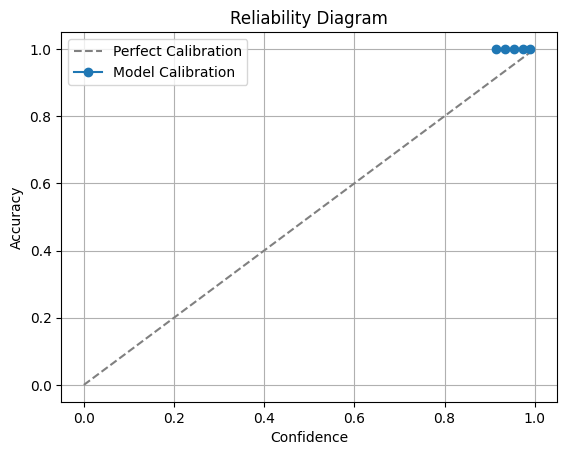

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Example confidence scores and ground truth labels (1=correct, 0=incorrect)
confidence_scores = np.array([0.95, 0.96, 0.92, 0.98, 0.94, 0.90, 0.91, 0.99, 0.93, 0.97])
ground_truth = np.array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])  # All samples correctly predicted

# Define bin edges for high confidence values
bin_edges = np.linspace(0.9, 1.0, 6)  # Bins: [0.9, 0.92, 0.94, 0.96, 0.98, 1.0]
bin_indices = np.digitize(confidence_scores, bin_edges, right=True)

# Calculate average confidence and accuracy per bin
bin_means = []
bin_accuracies = []
for i in range(len(bin_edges) - 1):
    indices = np.where(bin_indices == i + 1)[0]
    if len(indices) > 0:
        bin_means.append(np.mean(confidence_scores[indices]))
        bin_accuracies.append(np.mean(ground_truth[indices]))

# Plot reliability diagram and save to PNG
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Perfect Calibration')
plt.plot(bin_means, bin_accuracies, marker='o', label='Model Calibration')
plt.xlabel('Confidence')
plt.ylabel('Accuracy')
plt.title('Reliability Diagram')
plt.legend()
plt.grid(True)
plt.savefig('reliability_diagram.png', dpi=300, bbox_inches='tight')
plt.show()

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# Example data: confidence scores and corresponding ground truth (1=correct, 0=incorrect)
confidence_scores = np.array([0.95, 0.90, 0.60, 0.75, 0.85, 0.98, 0.40, 0.78, 0.92, 0.68])
ground_truth = np.array([0.932, 0.92, 0.574, 0.657, 0.789, 0.989, 0.32, 0.88, 0.99, 0.55])  # 1 = correct prediction, 0 = incorrect


In [29]:
num_bins = 10
bin_edges = np.linspace(0.0, 1.0, num_bins + 1)  # Bin edges from 0 to 1
bin_indices = np.digitize(confidence_scores, bin_edges, right=True)
bin_middlepoint = (bin_edges[1:] + bin_edges[:-1])/2

bin_confidences = []
bin_accuracies = []
bin_gaps = []

for i in range(1, num_bins + 1):
    indices = np.where(bin_indices == i)[0]  # Get indices of elements in the bin
    if len(indices) > 0:
        avg_confidence = np.mean(confidence_scores[indices])  # Average confidence
        avg_accuracy = np.mean(ground_truth[indices])  # Accuracy as mean of correct labels
        gap = bin_middlepoint[i-1] - avg_accuracy  # Gap between confidence and accuracy

        bin_confidences.append(avg_confidence)
        bin_accuracies.append(avg_accuracy)
        bin_gaps.append(gap)
    else:
        bin_confidences.append(0)
        bin_accuracies.append(0)
        bin_gaps.append(0)


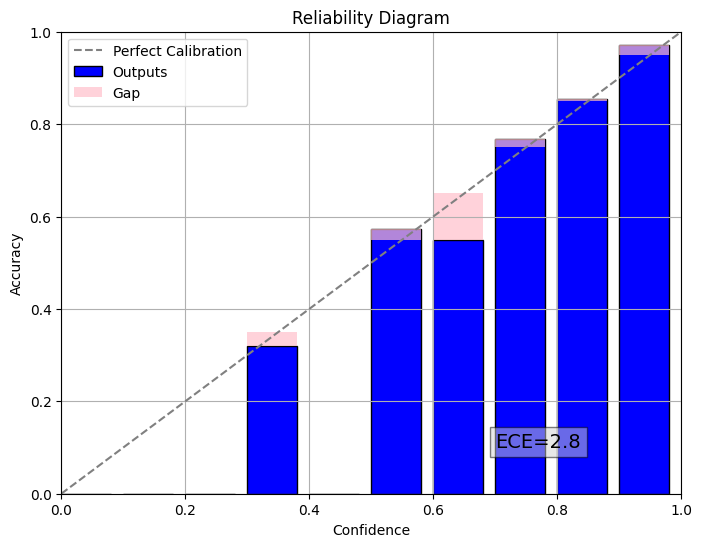

In [31]:
bar_width = 0.08  # Width of the bars

plt.figure(figsize=(8, 6))

# Plot the accuracy bars (blue)
plt.bar(bin_edges[:-1], bin_accuracies, width=bar_width, align='edge', color='blue', edgecolor='black', label="Outputs")

# Plot the confidence gaps (pink area) starting from accuracy values
plt.bar(bin_edges[:-1], bin_gaps, width=bar_width, align='edge', color='pink', alpha=0.7, label="Gap", bottom=bin_accuracies)

# Plot the diagonal reference line (perfect calibration)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label="Perfect Calibration")

# Annotate the ECE error
ece_error = np.mean(np.abs(np.array(bin_means) - np.array(bin_accuracies)))
plt.text(0.7, 0.1, f'ECE={ece_error * 100:.1f}', fontsize=14, bbox=dict(facecolor='lightgray', alpha=0.5))

# Formatting the plot
plt.xlabel('Confidence')
plt.ylabel('Accuracy')
plt.title('Reliability Diagram')
plt.legend()
plt.grid(True)
plt.xlim([0, 1])
plt.ylim([0, 1])

# Save the plot to a file
plt.savefig('reliability_diagram_box.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()